In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
movdf = pd.read_csv("movies.csv")
udf = pd.read_csv("ratings.csv")

In [2]:
movdf.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
udf.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
dffin = udf.pivot(index='movieId',columns='userId',values='rating')
dffin.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dffin.fillna(0,inplace=True)
dffin.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


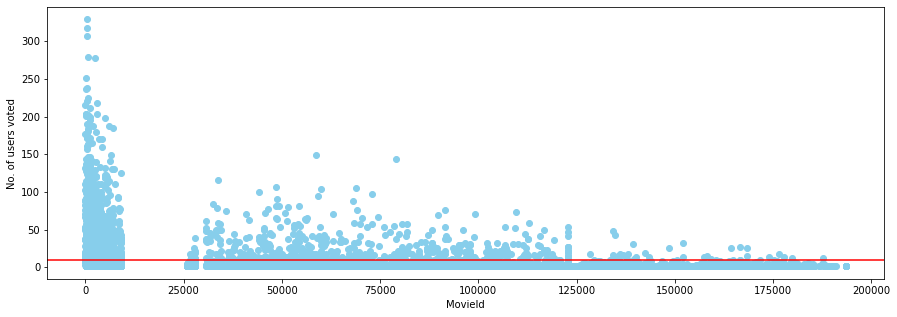

In [6]:
users_voted = udf.groupby('movieId')['rating'].agg('count')
movies_voted = udf.groupby('userId')['rating'].agg('count')
fig, ax = plt.subplots(1,1,figsize=(15,5))
plt.scatter(users_voted.index,users_voted,color='skyblue')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

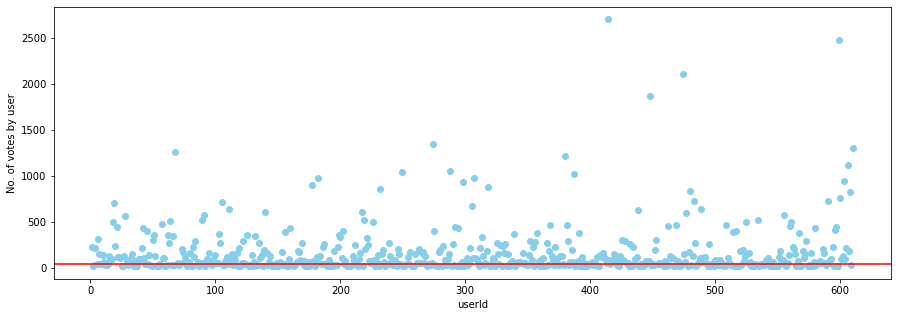

In [7]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
plt.scatter(movies_voted.index,movies_voted,color='skyblue')
plt.axhline(y=50,color='r')
plt.xlabel('userId')
plt.ylabel('No. of votes by user')
plt.show()

In [8]:
dffin

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#only users who have rated more than 10 movies and movies which got more than 50 ratings are to be considered

In [9]:
dffin = dffin.loc[:,movies_voted[movies_voted > 50].index]

In [10]:
dffin = dffin.loc[users_voted[users_voted > 10].index,:]

In [11]:
dffin

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#removing sparcity
csr_data = csr_matrix(dffin.values)
dffin.reset_index(inplace=True)

In [13]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [14]:
import difflib
def recommend(movie,n = None):
    if n is None:
        n = 5
    title_list = movdf['title'].tolist()
    common = difflib.get_close_matches(movie, title_list)
    if len(common) > 0:
        movief = common[0]
    else:
        return "No movies found. Please check your input"
            
    movidx = movdf[movdf.title == movief]["movieId"].values[0]
    movidx = dffin[dffin['movieId'] == movidx].index[0]
    dist , idx = knn.kneighbors(csr_data[movidx],n_neighbors=n+1)    
    rec_movidx = sorted(list(zip(idx.squeeze().tolist(),dist.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
    recfr = []
    for val in rec_movidx:
        movidx = dffin.iloc[val[0]]['movieId']
        idx2 = movdf[movdf['movieId'] == movidx].index
        recfr.append({'Title':movdf.iloc[idx2]['title'].values[0]})
    global df
    df = pd.DataFrame(recfr,index=range(1,n+1))
    return df

   

In [15]:
recommend('Mission impossible',10)

,Title
1,"Rock, The (1996)"
2,Star Wars: Episode VI - Return of the Jedi (1983)
3,Braveheart (1995)
4,Batman (1989)
5,GoldenEye (1995)
6,True Lies (1994)
7,Speed (1994)
8,Terminator 2: Judgment Day (1991)
9,Jurassic Park (1993)
10,Independence Day (a.k.a. ID4) (1996)


In [16]:
from tkinter import *
import tkinter

In [17]:
def main_screen():
    global root
    global s
    root = Tk()
    root.geometry("500x600")
    root.title('Movie Name')
    e = Entry(root)
    s = e.get()
    e.pack()
    e.focus_set()

    b = Button(root,text='enter',command=get_movies)
    b.place(x=200, y=250)
    b2 = Button(root,text='close',command = root.destroy)
    b2.place(x=250, y=250)
    #b.pack(side='bottom')
    root.mainloop()

def get_movies():
    #global e
    global nextwin
    nextwin = Tk()
    root.destroy()
    nextwin.geometry("500x600")
    #s = e.get()
    recommend(s)
    arr = df['Title'].tolist()
    lb = Listbox(nextwin, height = 15, width = 55, bg = "grey", activestyle = 'dotbox',  font = "Helvetica", fg = "white")

    for e in arr:
        i = 1
        lb.insert(i, str(e))
        i += 1
    lb.pack()
    nextwin.mainloop()
main_screen()

In [45]:
import difflib
title_list = movdf['title'].tolist()
a = difflib.get_close_matches('Iron Men', title_list)
c = a[0]
x = movdf[movdf.title == c]["movieId"].values[0]
#moviess = movdf[movdf['title'].str.contains('Iron Men')]
print(x)
print(a)

59315
['Iron Man (2008)', 'Iron Man (1931)']


In [72]:
recommend('Toy story')

,Title,Distance
1,Shrek (2001),0.381472
2,Star Wars: Episode IV - A New Hope (1977),0.380789
3,Toy Story 2 (1999),0.371637
4,Forrest Gump (1994),0.356542
5,Jurassic Park (1993),0.334884
